In [24]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('data/all_petitions_milestones_20221002-110814.csv')

In [6]:
#df.petition__slug, df.status_manual, df.signatureCount, df.createdAt

In [ ]:
# algorithm
# sorting the updates by datetime
# going over all dates in order
# adding petitionCurrent - petitionPrev to the total, writing the total

In [10]:
df.createdAt = pd.to_datetime(df.createdAt)

In [15]:
df = df.sort_values('createdAt')

In [27]:
def total_signatures_ts(df):
    # petition slug -> signature count
    last_count = {}
    times = []
    signatures = []
    current_count = 0
    for _, r in df.iterrows():
        if r.__typename == 'StarterPetitionUpdate':
            continue
        assert r.__typename == 'MilestonePetitionUpdate', r
        if r.petition__slug not in last_count:
            last_count[r.petition__slug] = 0

        delta = int(r.signatureCount) - int(last_count[r.petition__slug])
        current_count += delta
        times.append(r.createdAt)
        signatures.append(current_count)
    assert len(times) == len(signatures)
    return pd.DataFrame({'times': times, 'signatures': signatures})

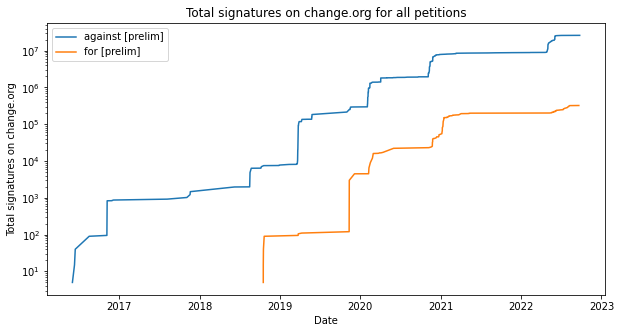

In [39]:
plt.figure(figsize=(10, 5))

dfc = total_signatures_ts(df[df.status_manual == 'against'])
plt.plot(dfc.times, dfc.signatures, label='against [prelim]')

dfc = total_signatures_ts(df[df.status_manual == 'for'])
plt.plot(dfc.times, dfc.signatures, label='for [prelim]')

plt.yscale('log')
plt.xlabel('Date')
plt.legend()
plt.ylabel('Total signatures on change.org')
plt.title('Total signatures on change.org for all petitions')

plt.savefig('./figures/signatures_bydate.png', bbox_inches='tight')


plt.show()